In [1]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

### This notebook will create a simple function and create a basic learning model, with gradient descent

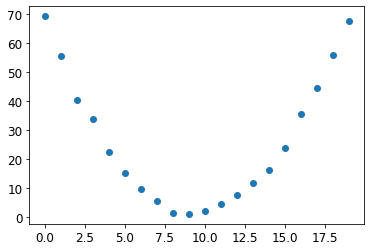

In [173]:
# Define a tensor of time values
time = torch.arange(0,20).float(); time
# Define a tensor of speed values, with a quadratic element built in
speed = torch.randn(20)*2 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [174]:
# We base our model on a quadratic function, based on the shape of the plot
# Need to solve for a, b and c

def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [175]:
# Also define a function to measure loss. The mean squared error works.

def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

### Initialise Parameters

In [217]:
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

### Make Predictions

In [218]:
preds = f(time, params)

In [219]:
# Visualising accuracy of predictions
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-100,150)

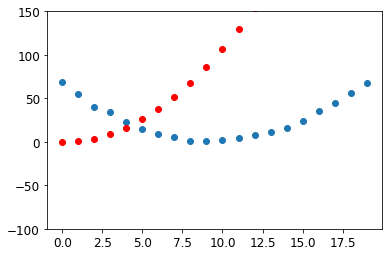

In [220]:
show_preds(preds)

### Calculate Loss

In [221]:
loss = mse(preds, speed)
loss

tensor(158.8827, grad_fn=<SqrtBackward>)

### Calculate Gradients

In [222]:
loss.backward()

In [223]:
params.grad

tensor([165.6369,  10.6204,   0.6680])

In [224]:
params.grad * 1e-5

tensor([1.6564e-03, 1.0620e-04, 6.6799e-06])

In [225]:
params

tensor([ 1.0935, -0.2637, -0.2296], requires_grad=True)

### Update the weights

In [226]:
lr = 1e-4
params.data -=params.grad.data*lr
params.grad=None

In [227]:
params

tensor([ 1.0770, -0.2648, -0.2296], requires_grad=True)

### Update Predictions

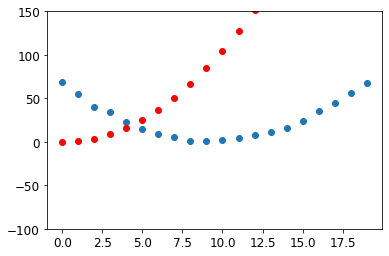

In [228]:
preds = f(time, params)
show_preds(preds)

In [234]:
# Create function to run through this process on repeat

def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    show_preds(preds)
    return preds

78.38111114501953
75.84893798828125
73.33678436279297
70.84656524658203
68.38046264648438
65.94088745117188
63.530555725097656
61.15249252319336
58.810089111328125
56.507137298583984
54.24786376953125
52.03694152832031
49.87957000732422
47.78145217895508
45.74878692626953
43.78826141357422
41.90695571899414
40.11224365234375
38.41156768798828
36.81220245361328
35.320892333984375
33.9434700012207
32.68437576293945


<ipython-input-219-26ce9e0ffad1>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if ax is None: ax=plt.subplots()[1]


31.5462646484375
30.529613494873047
29.632530212402344
28.850717544555664
28.17767333984375
27.605077743530273
27.123336791992188
26.722156524658203
26.391124725341797
26.120176315307617
25.89995574951172
25.72202491760254
25.578977584838867
25.46445083618164
25.37307357788086
25.30035972595215
25.242630004882812
25.196876525878906
25.160667419433594
25.132043838500977
25.109437942504883
25.091596603393555
25.07752227783203
25.066421508789062
25.05767250061035
25.0507755279541
25.04534149169922
25.041059494018555
25.037683486938477
25.035022735595703
25.032926559448242
25.031272888183594
25.02996826171875
25.0289363861084
25.028121948242188
25.027477264404297
25.026966094970703
25.02656364440918
25.0262393951416
25.025985717773438
25.02578353881836
25.025617599487305
25.02548599243164
25.025375366210938
25.02528953552246
25.025217056274414
25.025157928466797
25.02510643005371
25.02506446838379
25.025028228759766
25.024993896484375
25.024967193603516
25.024940490722656
25.02491760253906

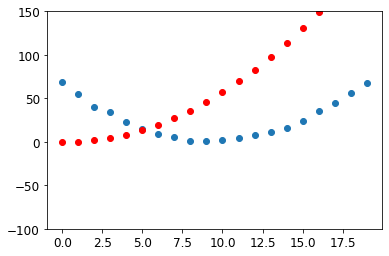

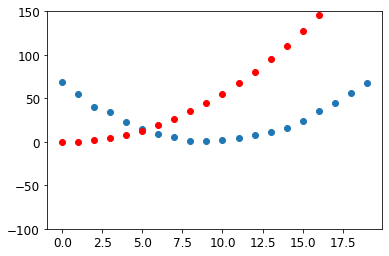

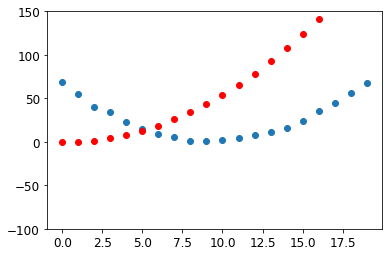

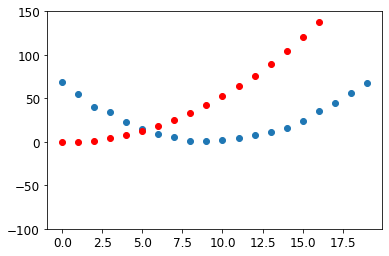

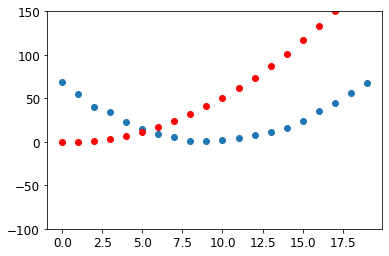

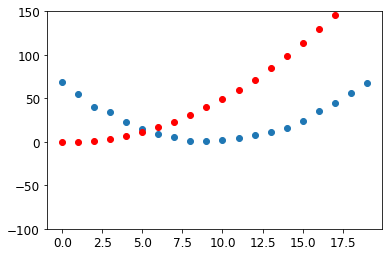

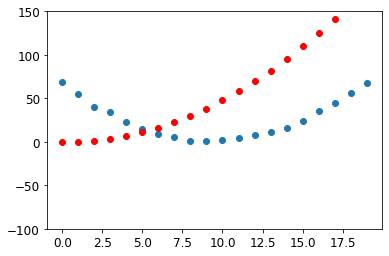

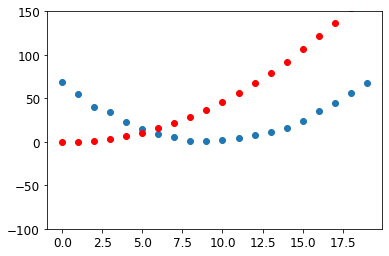

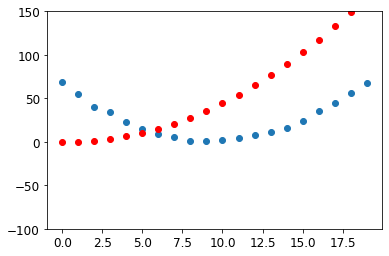

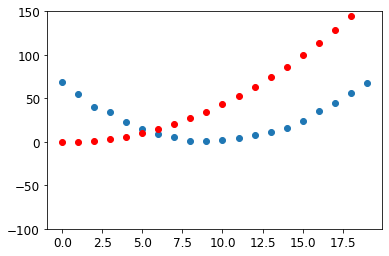

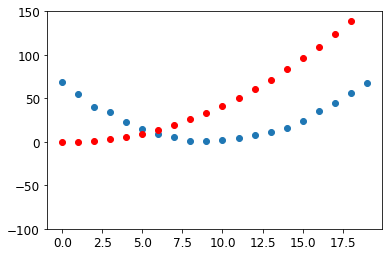

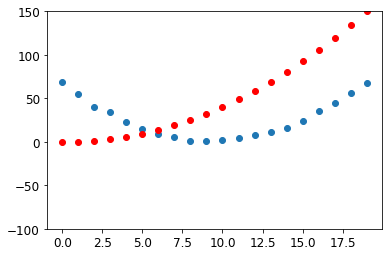

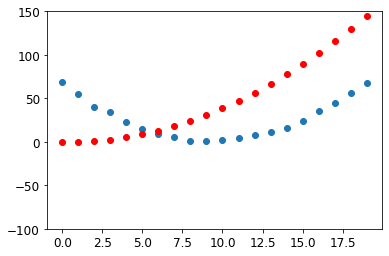

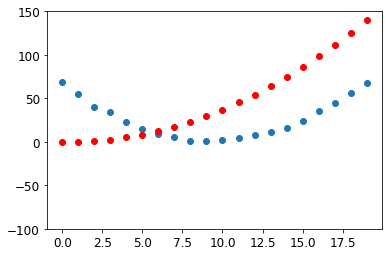

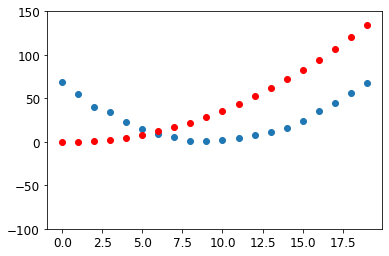

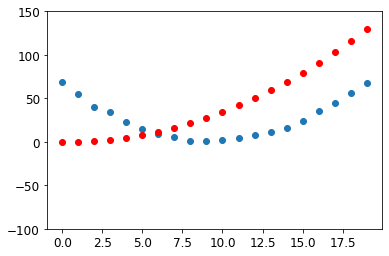

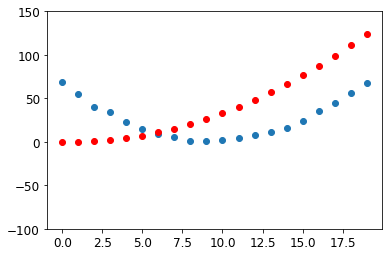

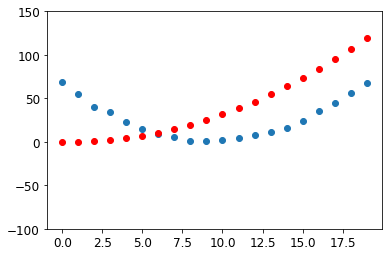

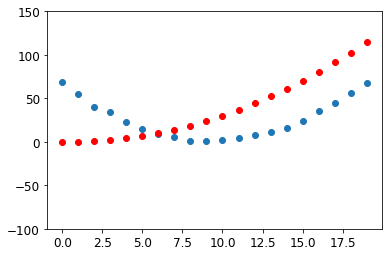

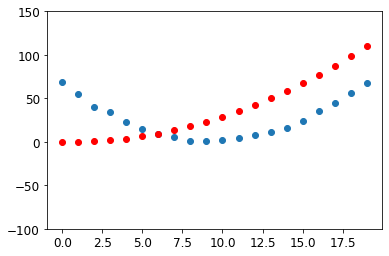

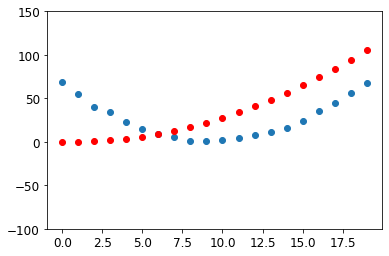

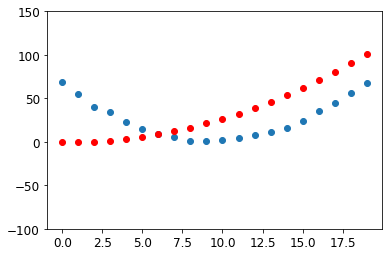

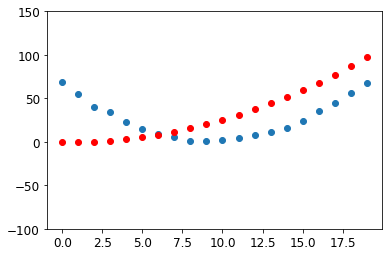

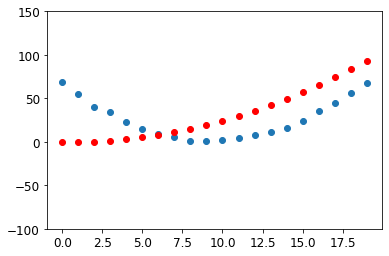

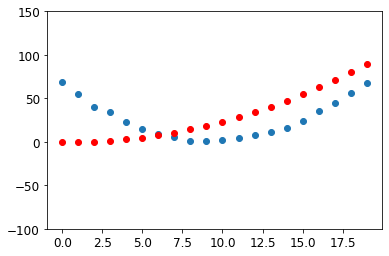

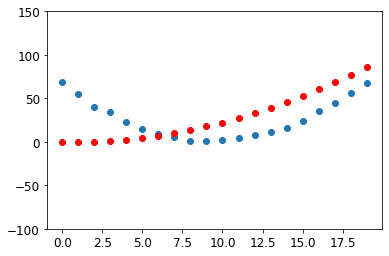

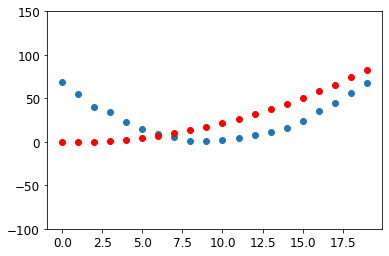

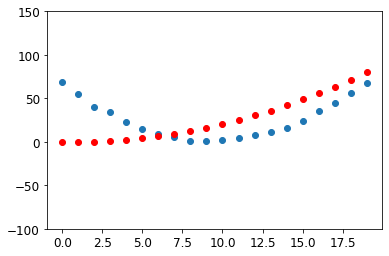

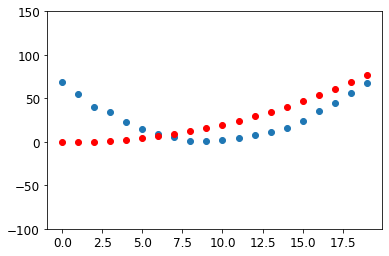

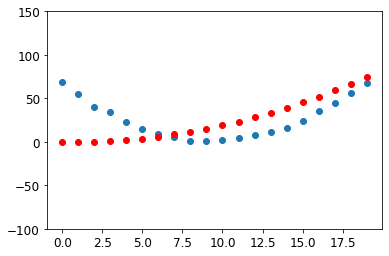

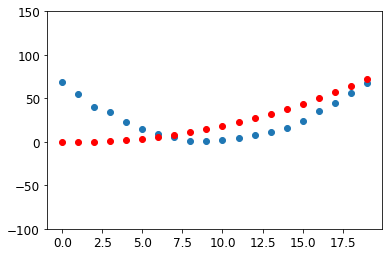

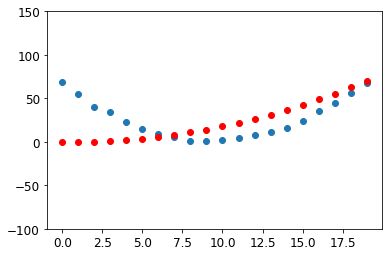

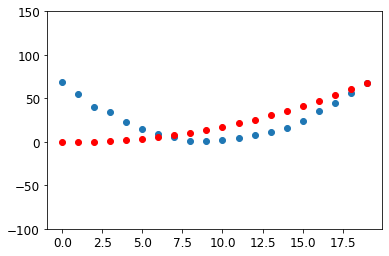

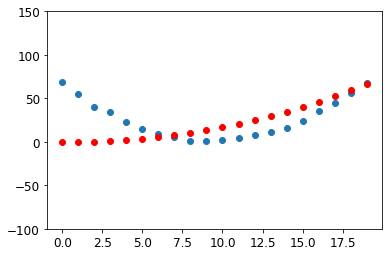

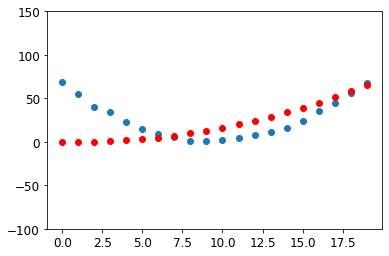

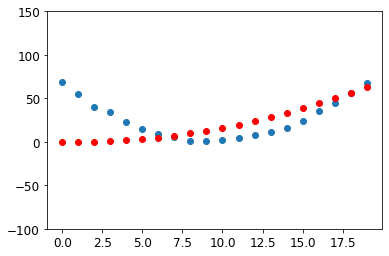

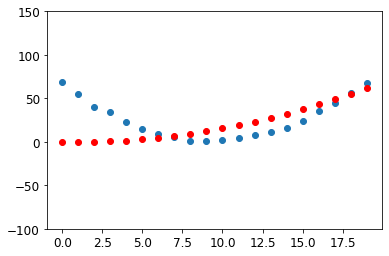

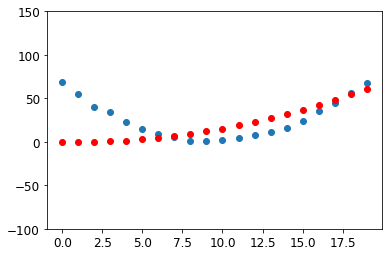

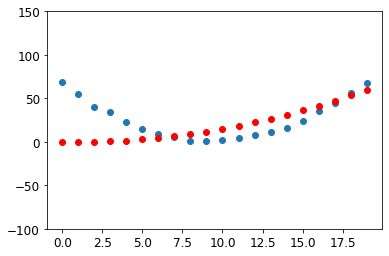

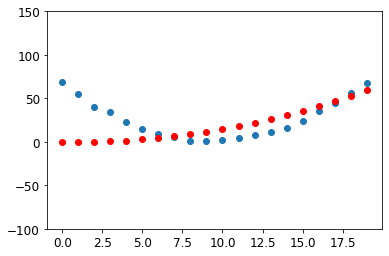

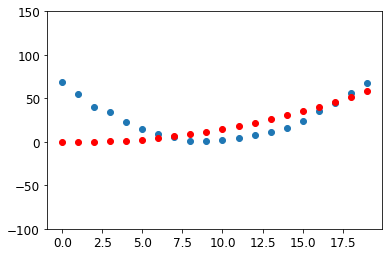

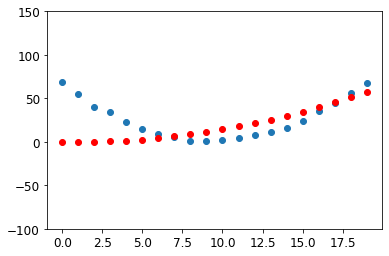

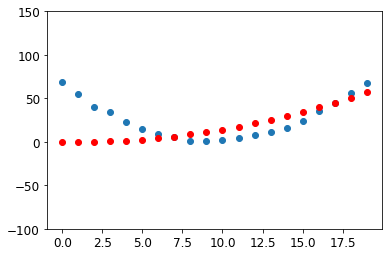

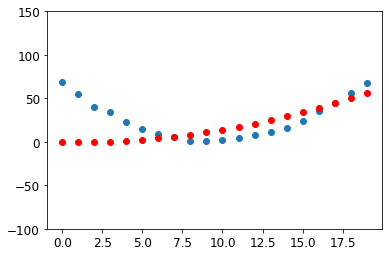

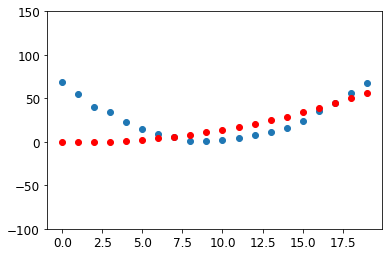

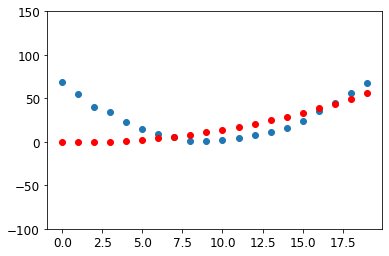

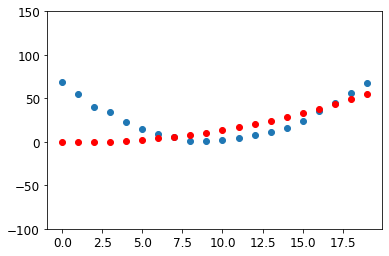

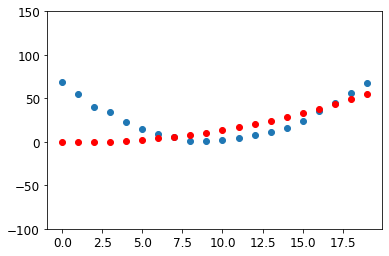

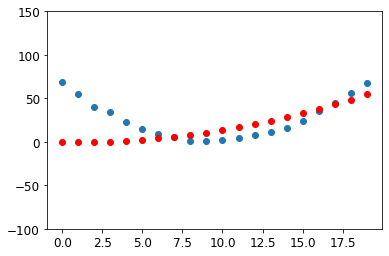

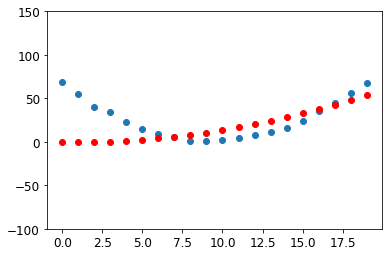

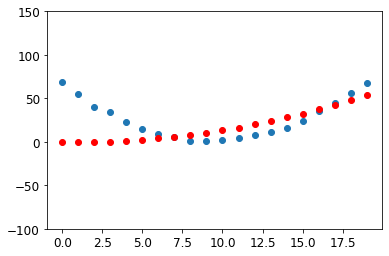

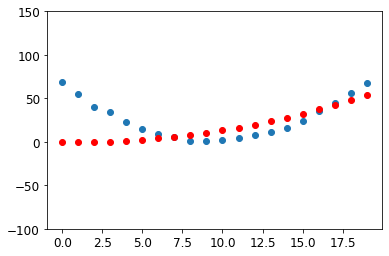

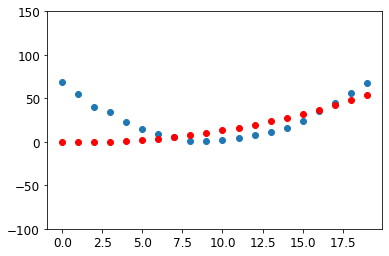

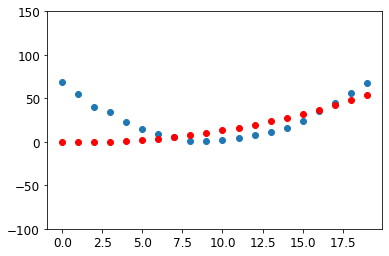

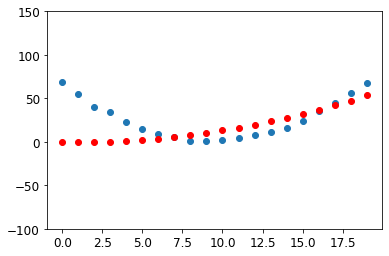

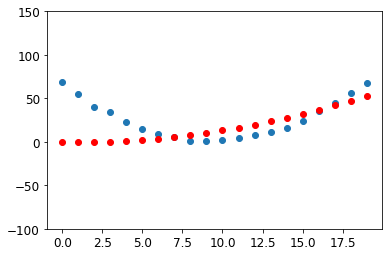

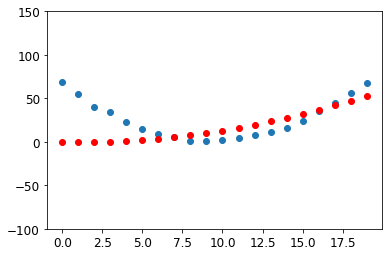

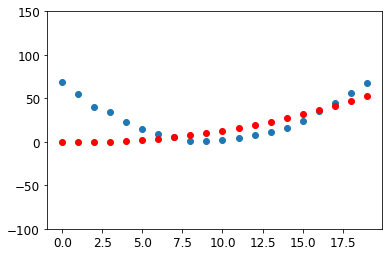

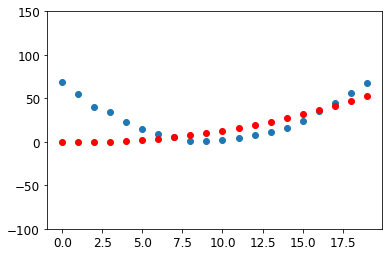

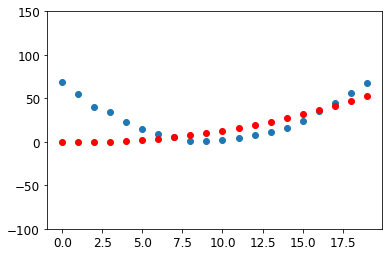

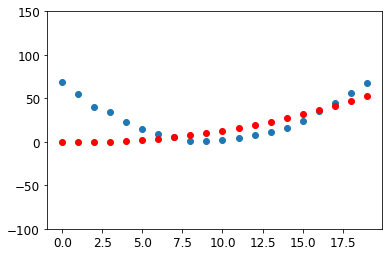

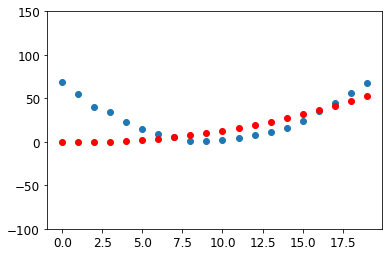

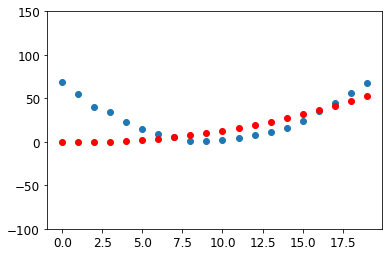

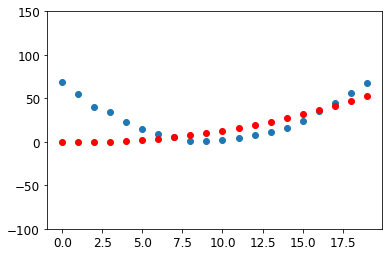

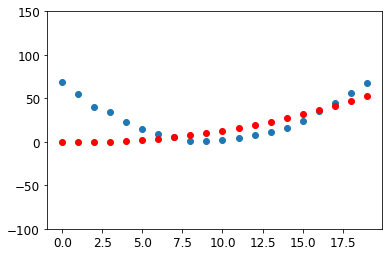

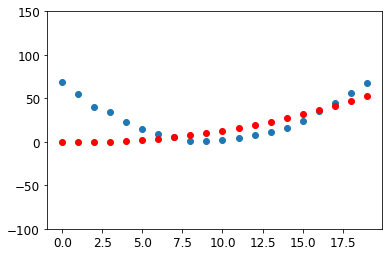

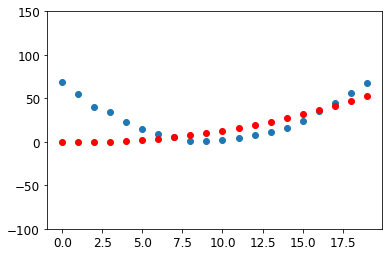

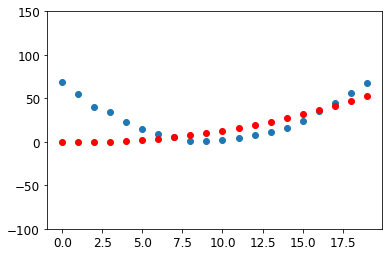

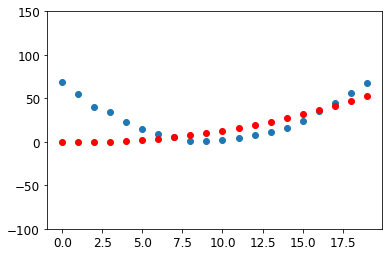

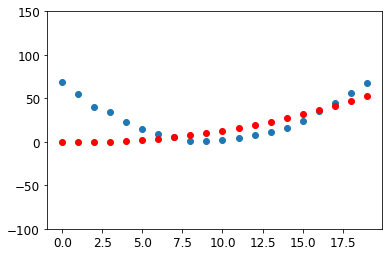

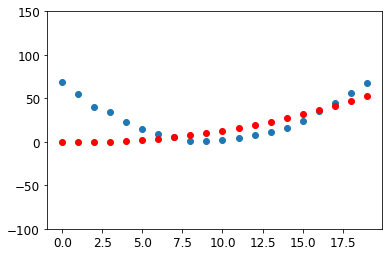

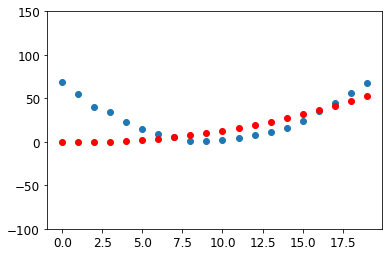

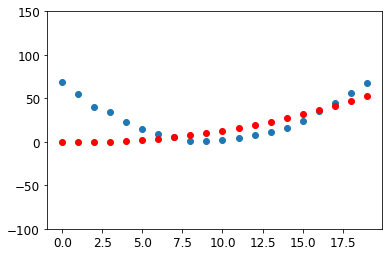

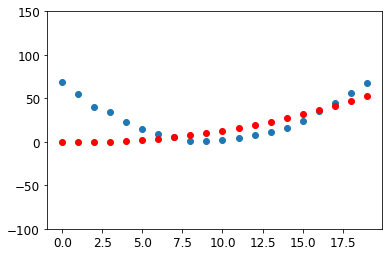

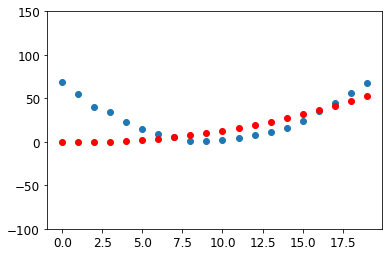

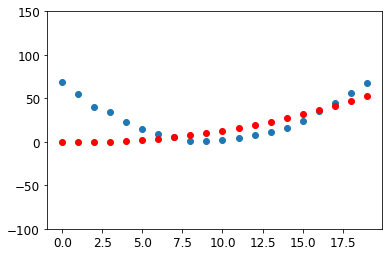

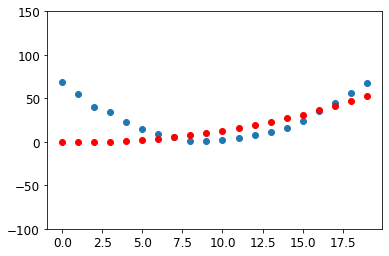

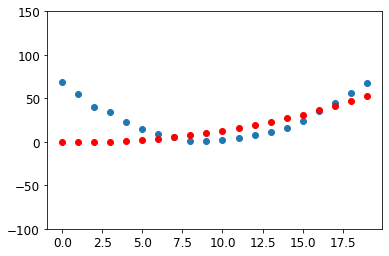

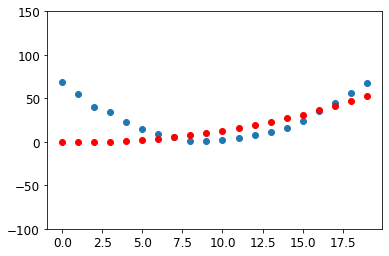

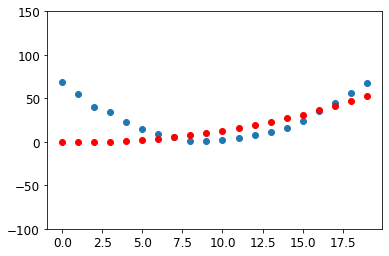

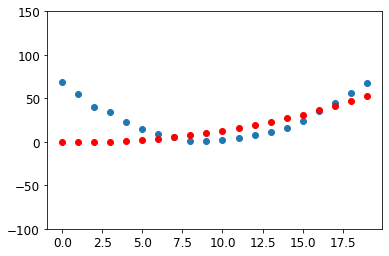

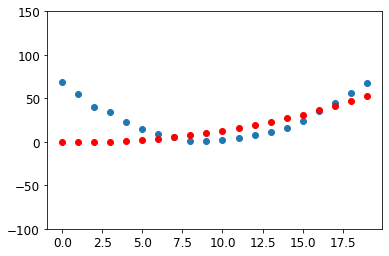

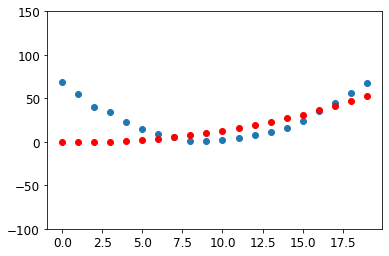

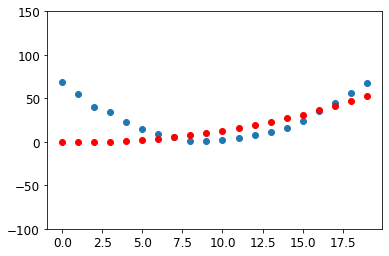

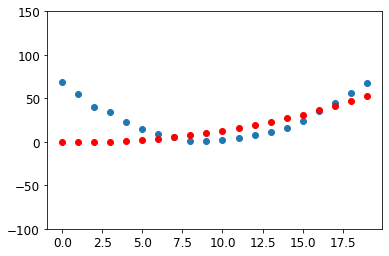

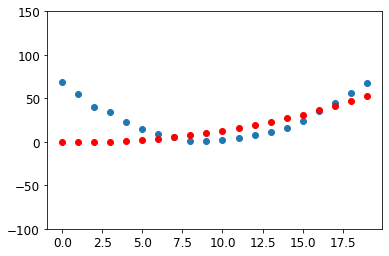

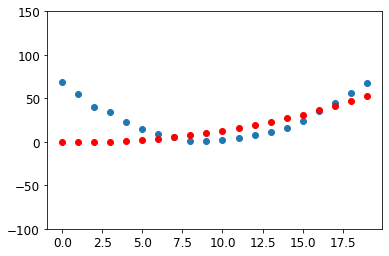

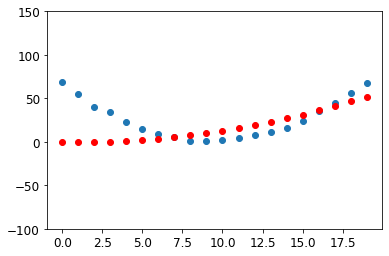

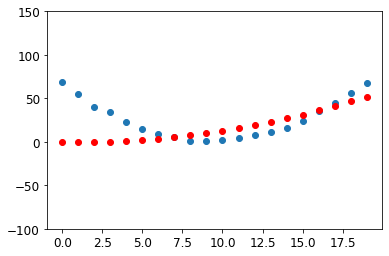

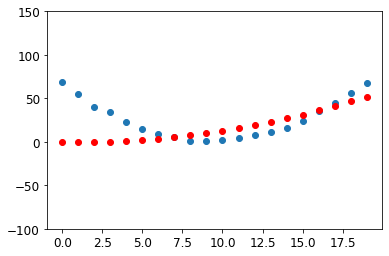

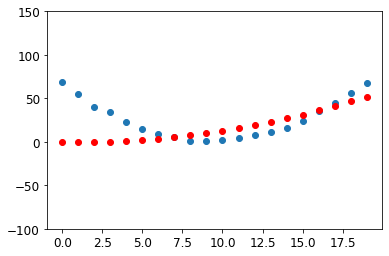

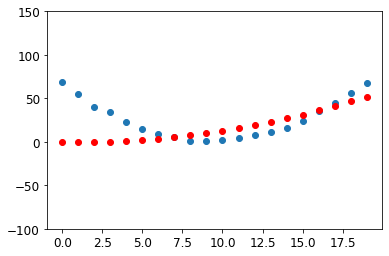

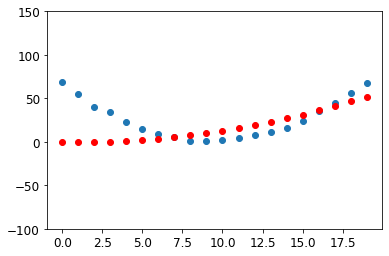

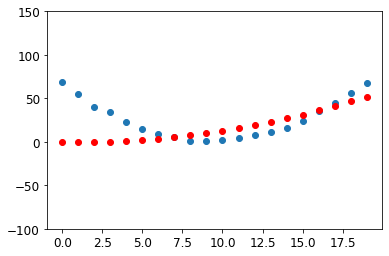

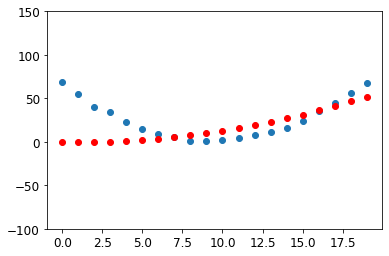

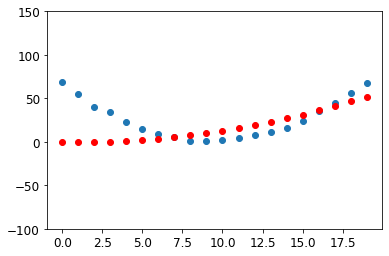

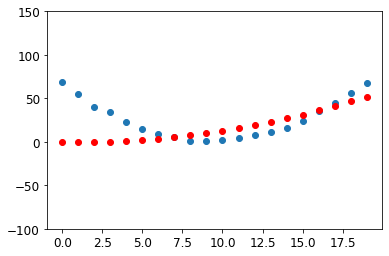

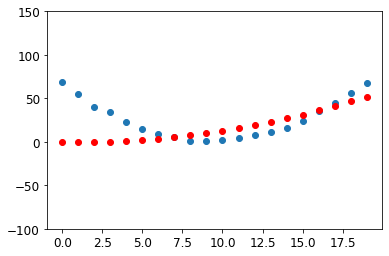

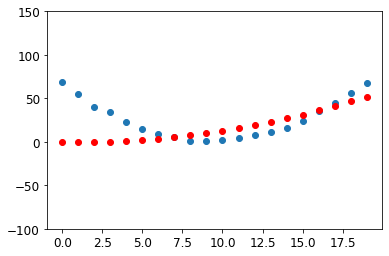

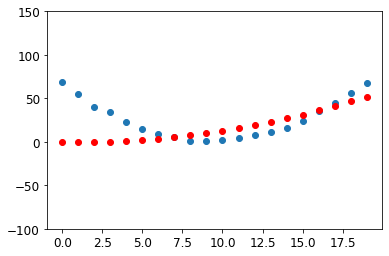

In [236]:
# Repeat it 25 times, outputting the loss

for i in range(100): apply_step(params)

In [231]:
params = orig_params.detach().requires_grad_()

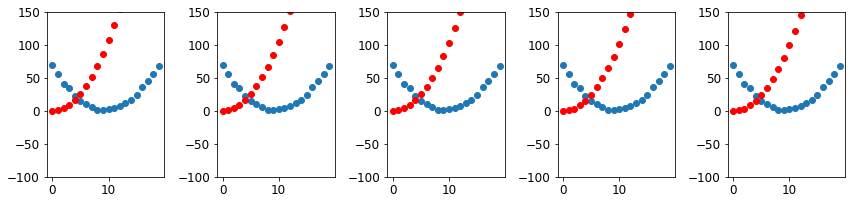

In [232]:
# Plot some of the graphs, showing the fit changing 

_,axs = plt.subplots(1,5,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()